<a href="https://colab.research.google.com/github/mswetha44/Diabetes/blob/main/Health_Daibetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all necessary libraries

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import load_iris
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

Descriptive statistics

In [ ]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')[0:10000]
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
9996,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,5.0
9997,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,7.0
9998,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0


Checking Duplicates

In [ ]:
#Checking duplicates rows in dataset df1 to eliminate them


duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  74


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [ ]:
#remove duplicate in rows

df.drop_duplicates(inplace=True)

Explaining all attributes



*   Diabetes_binary: 0 = no diabetes, 1 = diabetes.

*   HighBP: 0 = no high BP, 1 = high BP.

*   HighChol: 0 = no high cholesterol, 1 = high cholesterol

*   -CholCheck: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years.

*   BMI: Body Mass Index.
*    Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes.
*  Stroke: (Ever told) you had a stroke. 0 = no, 1 = yes.
* HeartDiseaseorAttack: Coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes.
*   PhysActivity: Physical activity in past 30 days - not including job 0 = no, 1 = yes.
* Fruits: Consume Fruit 1 or more times per day 0 = no, 1 = yes.
* Veggies: Consume Vegetables 1 or more times per day 0 = no, 1 = yes.
* HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no.
* AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes.
* NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes.
* GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor.
* MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how.
* PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30.
* DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes.
* Sex: 0 = female 1 = male.
* Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older.
* Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8.
* Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,0005=𝑙𝑒𝑠𝑠𝑡ℎ𝑎𝑛
10,0005=�����











In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       9926 non-null   float64
 1   HighBP                9926 non-null   float64
 2   HighChol              9926 non-null   float64
 3   CholCheck             9926 non-null   float64
 4   BMI                   9926 non-null   float64
 5   Smoker                9926 non-null   float64
 6   Stroke                9926 non-null   float64
 7   HeartDiseaseorAttack  9926 non-null   float64
 8   PhysActivity          9926 non-null   float64
 9   Fruits                9926 non-null   float64
 10  Veggies               9926 non-null   float64
 11  HvyAlcoholConsump     9926 non-null   float64
 12  AnyHealthcare         9926 non-null   float64
 13  NoDocbcCost           9926 non-null   float64
 14  GenHlth               9926 non-null   float64
 15  MentHlth             

In [ ]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     52
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
df.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,...,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000
mean,0.161697,0.465243,0.451541,0.961112,28.605380,0.453556,0.047250,0.101551,0.741487,0.602156,...,0.939250,0.107999,2.607898,3.557425,4.803546,0.196957,0.417691,8.122104,4.999698,5.904594
std,0.368191,0.498816,0.497671,0.193337,6.340238,0.497863,0.212183,0.302073,0.437839,0.489478,...,0.238882,0.310395,1.102410,7.867062,9.209069,0.397720,0.493204,2.999849,0.994443,2.127158
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: title={'center': 'Correlation with Diabetes_binary'}>

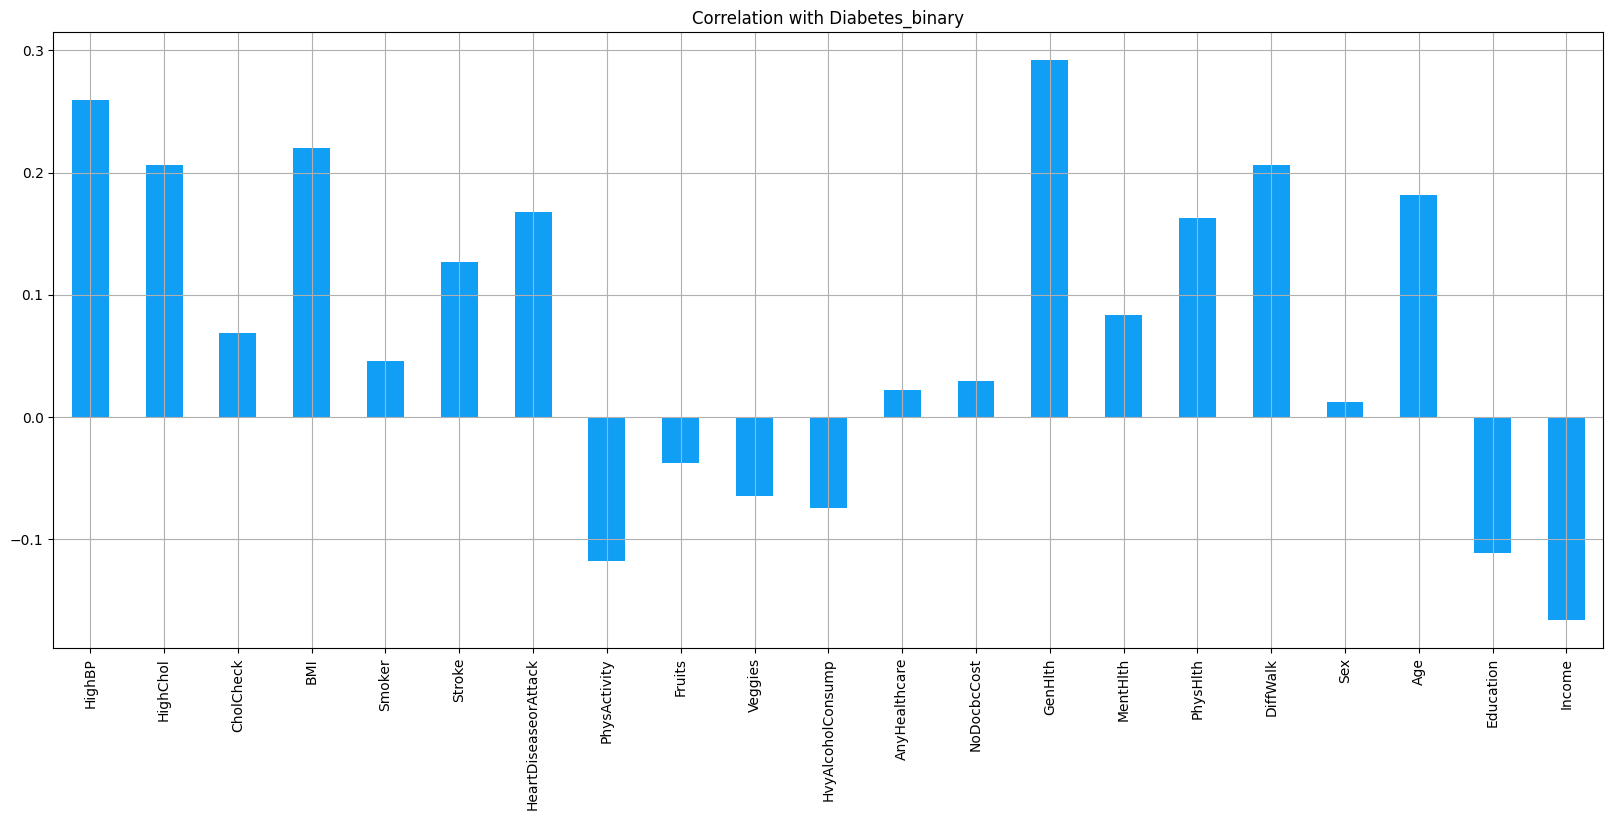

In [ ]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="#119ef5")

Text(0.5, 1.0, 'correlation of features')

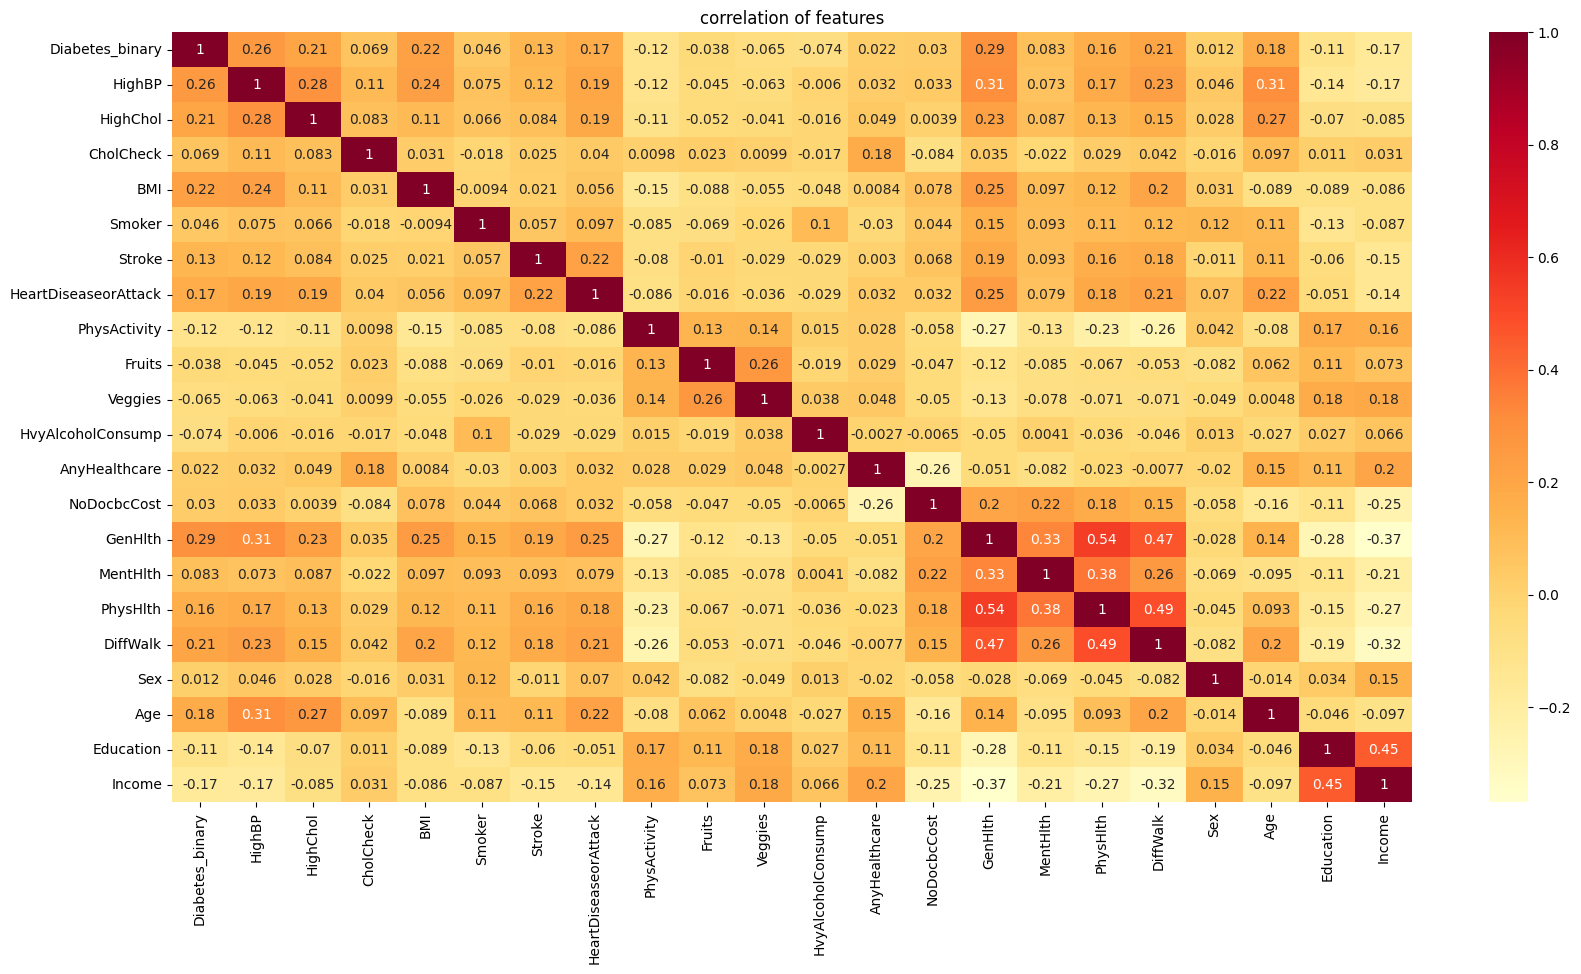

In [ ]:
#heatmap

plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd')
plt.title("correlation of features")

correlation heatmap show relation between columns
GenHlth and PhysHlth are highly correleted with each other.(positive relation)

GenHlth and Income are highly correleted with each other .(negetive relation

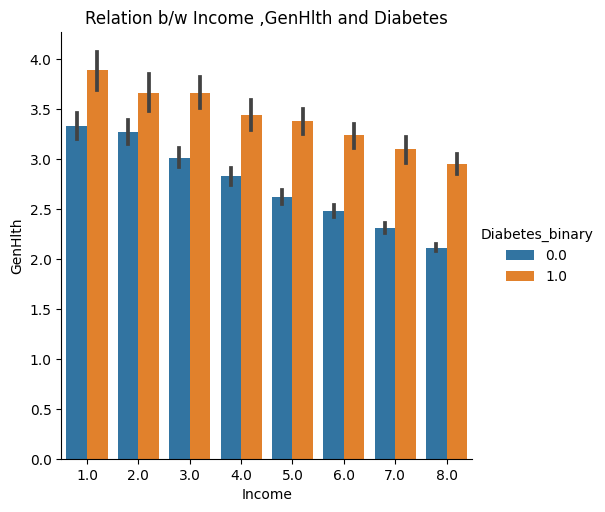

In [ ]:
sns.catplot(x="Income" , y ="GenHlth" , data = df , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Income ,GenHlth and Diabetes")
plt.show()

GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

Research Question1:
* H0: The two categorical variables are independent (Income has no association with GenHlth).
*H1: The two categorical variables are dependent. (Income is associated with GenHlth)

In [ ]:
contingency_table = pd.crosstab(df['Income'], df['GenHlth'])
contingency_table

GenHlth,1.0,2.0,3.0,4.0,5.0
Income,,,,,
1.0,28,48,132,131,89
2.0,36,80,154,156,96
3.0,66,143,250,177,118
4.0,87,195,293,180,84
5.0,117,295,365,171,63
6.0,209,463,502,178,69
7.0,313,618,520,156,63
8.0,785,1352,914,189,41


In [ ]:

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)

if p < alpha:
    print("\nReject the null hypothesis. There is a significant association between GenHlth and Income.")
else:
    print("\nFail to reject the null hypothesis. There is a no significant association at least between GenHlth and Income")


Chi-Square Statistic: 1541.6898321941335
P-value: 9.331989655036965e-308
Degrees of Freedom: 28
Expected Frequencies:
[[  70.75841225  137.72234536  134.96272416   57.69333065   26.86318759]
 [  86.2988112   167.96977634  164.60407012   70.36429579   32.76304654]
 [ 124.6538384   242.62301028  237.76143462  101.63731614   47.32440056]
 [ 138.70632682  269.97441064  264.56477937  113.09510377   52.65937941]
 [ 167.14195043  325.32077373  318.8021358   136.28027403   63.45486601]
 [ 234.92454161  457.25105783  448.08885755  191.54724965   89.18829337]
 [ 276.09006649  537.37457183  526.60689099  225.11182752  104.81664316]
 [ 542.42605279 1055.764054   1034.60910739  442.27060246  205.93018336]]

Significance Level (alpha): 0.05

Reject the null hypothesis. There is a significant association between GenHlth and Income.


Research Question2:

* H0: There is a significant association at least between two features  diabetes,GenHlth and Income.
* H1:There is a significant association between Diabetes,Genhlth and Income.

In [ ]:
contingency_table = pd.crosstab(index=[df['Diabetes_binary'], df['GenHlth']], columns=df['Income'])
contingency_table

Income                   1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0
Diabetes_binary GenHlth                                         
0.0             1.0       27   28   61   78  114  204  299   776
                2.0       37   72  121  172  271  421  569  1272
                3.0      108  118  189  223  277  405  422   770
                4.0       92  104  121  118  110  115  114   130
                5.0       52   65   64   51   41   47   34    29
1.0             1.0        1    8    5    9    3    5   14     9
                2.0       11    8   22   23   24   42   49    80
                3.0       24   36   61   70   88   97   98   144
                4.0       39   52   56   62   61   63   42    59
                5.0       37   31   54   33   22   22   29    12

In [ ]:


# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)

if p < alpha:
    print("\nReject the null hypothesis. There is a significant association between Diabetes,GenHlth and Income.")
else:
    print("\nFail to reject the null hypothesis. There is a significant association at least between two features  diabetes,GenHlth and Income")


Chi-Square Statistic: 1654.9387873919281
P-value: 2.9836110232916262e-304
Degrees of Freedom: 63
Expected Frequencies:
[[ 68.42998187  83.45899657 120.55188394 134.14195043 161.64184969
  227.19393512 267.00483578 524.57656659]
 [126.55450332 154.34918396 222.94882128 248.08230909 298.94066089
  420.17277856 493.79911344 970.15262946]
 [108.31513198 132.10396937 190.81684465 212.3280274  255.85653838
  359.61636107 422.6314729  830.33165424]
 [ 38.97964941  47.54060044  68.6697562   76.41104171  92.07576063
  129.41607898 152.09349184 298.81362079]
 [ 16.5146081   20.1416482   29.09349184  32.37326214  39.00997381
   54.83004231  64.43784002 126.59913359]
 [  2.32843038   2.83981463   4.10195446   4.56437639   5.50010075
    7.73060649   9.08523071  17.8494862 ]
 [ 11.16784203  13.62059238  19.674189    21.89210155  26.38011283
   37.07827927  43.57545839  85.61142454]
 [ 26.64759218  32.50010075  46.94458997  52.23675196  62.94559742
   88.47249647 103.97541809 204.27745315]
 [ 18.71

Cochran–Mantel–Haenszel Test for 3-Dimensional Tables is the extension of Chi square test.The Cochran–Mantel–Haenszel test is an extension of the chi-square test of association.  It is used for multiple chi-square tests across multiple groups or times.  The data are stratified so that each chi-square table is within one group or time.